# 画像の収集
1. ' TrainData ' 以下のフォルダに入る
2. 任意のフォルダで ' googleimagesdownload -k _KEYWORD_ -l 5 ' を実行する

    [参考ページ](https://co.bsnws.net/article/295)
    

## キーワードとDL数の設定
キーワードの設定
dl数の設定

In [4]:
def set_key_and_dl_num():
    from tkinter import Tk, filedialog

    root = Tk()
    root.attributes('-topmost', True)
    root.withdraw()
    root.lift()
    root.focus_force()
    temp = filedialog.askdirectory(title='画像を保存するフォルダを選択してください')
    root.destroy()

    if not temp:
        print('フォルダが選択されませんでした')
    else:
        from pathlib import Path
        from tkinter.filedialog import askdirectory
        
        global download_dir_path
        download_dir_path = Path(temp)

        #　検索キーワードを設定
        global keyword
        keyword = 'モネ'
        
         #　dl数を設定
        global dl_num
        dl_num = 3

        print(f'path: {download_dir_path}')
        print(f'keyword: {keyword}')
        print(f'dl_num: {dl_num}')
        
set_key_and_dl_num()

path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust
keyword: モネ
dl_num: 3


## ダウンロード

In [5]:
def download():
    dl_dir_path = str(download_dir_path)
    !googleimagesdownload -k $keyword -l $dl_num -o $dl_dir_path

download()


Item no.: 1 --> Item name = \u30e2\u30cd
Evaluating...
Starting Download...
Completed Image ====> 1.A1T1PLop9qL.jpg
Completed Image ====> 2.monet-main.jpg
Completed Image ====> 3.000000001420.jpg

Errors: 0


Everything downloaded!
Total errors: 0
Total time taken: 3.000023365020752 Seconds


## 画像ごとにフォルダを作る

In [6]:
def format_dir():
    dl_path = str(download_dir_path/keyword)
    %run -i C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\JupyterUtil\image_folder_formatter\main.py -p $dl_path -n $dl_num
        
format_dir()

dl_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ
dl_num: 3
-- complete! --


# 作業フォルダの選択

In [7]:
def select_work_dir():
    from tkinter import Tk, filedialog 

    root = Tk()
    root.attributes('-topmost', True)
    root.withdraw()
    root.lift()
    root.focus_force()

    initialdir = 'C:/Users/init/Documents/PythonScripts/EnhanceImageFromUserPreference/TrainData'
    temp = filedialog.askdirectory(title='作業フォルダを選択してください', initialdir=initialdir)
    root.destroy()

    if not temp:
        print('フォルダが選択されませんでした')
    else:
        from tkinter.filedialog import askdirectory
        from pathlib import Path
        import itertools
        from pprint import pprint

        global work_dir_path 
        work_dir_path = Path(temp)

        global work_image_path_list 
        work_image_path_list = [path for path in itertools.chain(work_dir_path.glob('**/*.png'), work_dir_path.glob('**/*.jpg'))]
        work_image_path_list.sort()
        
select_work_dir()

print(f'work path: {str(work_dir_path)}')
print('work images path:')
for path in work_image_path_list:
    print(f'\t{str(path)}')

work path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ
work images path:
	C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\1.A1T1PLop9qL.jpg
	C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\2\2.monet-main.jpg
	C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\3\3.000000001420.jpg


# モデルタイプの選択

In [8]:
model_type = 'compare'
print(f'model type: {model_type}')

model type: compare


# 学習データを作る

## スコアをつける
1. ’ 1 ’の画像に対して100枚の補正画像を生成する
2. ’ 1、2、3 ’の画像に対して10枚の補正画像を生成する

In [10]:
def scoring():
    known_image_path = work_image_path_list[0]
    save_file_path = str(known_image_path.parent/'scored_parameter'/'data.csv')
    known_image_path = str(known_image_path)
    %run -i C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainDataGenerator\tournament\tournament_comparer.py -p $known_image_path -n 100 -s $save_file_path

    for image_path in work_image_path_list:
        save_file_path = str(image_path.parent/'scored_parameter'/'test.csv')
        %run -i C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainDataGenerator\tournament\tournament_comparer.py -p $image_path -n 10 -s $save_file_path

scoring()
print('--- complete ! ---')

image_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\1.A1T1PLop9qL.jpg
save_file_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\scored_parameter\data.csv
generate_num: 100
image_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\1.A1T1PLop9qL.jpg
save_file_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\scored_parameter\test.csv
generate_num: 10


ERROR:root:File `"'C:\\Users\\init\\Documents\\PythonScripts\\EnhanceImageFromUserPreference\\TrainDataGenerator\\tournament\\tournament_comparer.py'.py"` not found.


image_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\3\3.000000001420.jpg
save_file_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\3\scored_parameter\test.csv
generate_num: 10
--- complete ! ---


## スコアデータのグラフ化
グラフは ' 研究成果/画像/_カテゴリ_/グラフ ' に保存する

param_paths: ['C:/Users/init/Documents/PythonScripts/PredictEvaluationFromHumanPreference/TrainData/Photography/Artificial/salad/1/scored_parameter/data1.csv']
graph_type: scatter


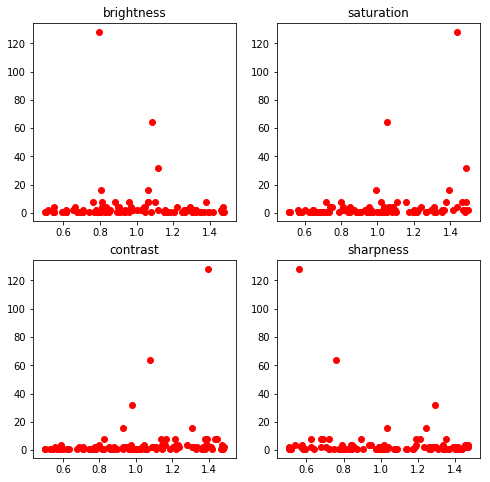

In [1]:
%matplotlib inline
from tkinter import Tk, filedialog
root = Tk()
root.attributes('-topmost', True)
root.withdraw()
root.lift()
root.focus_force()

temp = filedialog.askopenfilenames(title='パラメータファイルの選択', filetypes=[('', '.csv')])
root.destroy()

if not temp:
     print('ファイルが選択されませんでした')
else:
    param_path = ' '.join(temp)
    %run -i C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainDataGenerator\param_score_graphizer.py -p $param_path -g scatter

## スコアデータからTFRecords形式へ変換
保存先のデータセットフォルダ名を設定

In [13]:
def convert():
    from tkinter import Tk, filedialog
    image_path = work_image_path_list[0]
    
    #　保存先のデータセットフォルダ名を設定
    dataset_name = 'data1'
    dataset_dir_path = image_path.parent/model_type/'tfrecords'/dataset_name
    if not dataset_dir_path.exists():
        dataset_dir_path.mkdir(parents=True)
    
    root = Tk()
    root.attributes('-topmost', True)
    root.withdraw()
    root.lift()
    root.focus_force()
    
    initialdir = str(image_path.parent/'scored_parameter')
    temp = filedialog.askopenfilenames(title='パラメータファイルの選択', filetypes=[('', '.csv')], initialdir=initialdir)
    root.destroy()

    if not temp:
         print('ファイルが選択されませんでした')
    else:
        param_paths = ' '.join(temp)
        print(param_paths)
        dataset_dir_path = str(dataset_dir_path)
        
        %run -i C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainDataGenerator\TFRecordsMaker\ScoredParamConverter\scored_param_converter.py \
            -d $dataset_dir_path -p $param_paths -i $image_path -t $model_type

convert()

C:/Users/init/Documents/PythonScripts/EnhanceImageFromUserPreference/TrainData/Illust/モネ/1/scored_parameter/data.csv
dataset_dir_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\compare\tfrecords\data1
param_paths: ['C:/Users/init/Documents/PythonScripts/EnhanceImageFromUserPreference/TrainData/Illust/モネ/1/scored_parameter/data.csv']
image_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\1.A1T1PLop9qL.jpg
model_type: compare



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2033/2033 [00:04<00:00, 453.74it/s]


--- complete ! ---


# 好みの学習

## モデル読み込み関数の定義

In [14]:
def get_load_dir_path():
    from tkinter import Tk, filedialog
    root = Tk()
    root.attributes('-topmost', True)
    root.withdraw()
    root.lift()
    root.focus_force()
    
    train_dir_path = work_image_path_list[0].parent/model_type
    summary_dir_path = train_dir_path/'summary'
    
    initialdir = str(summary_dir_path)
    load_dir_path = filedialog.askdirectory(title='モデルをロードするフォルダを選択')
    root.destroy()
    
    return load_dir_path

## 学習
使用するデータセットの設定

In [21]:
def train():
    train_dir_path = work_image_path_list[0].parent/model_type
    train_image_path = [path for path in train_dir_path.parent.iterdir() if path.is_file()][0]
    
    #　使用するデータセットの設定
    dataset_name = 'data1'
    dataset_dir_path = str(train_dir_path/'tfrecords'/dataset_name)

    summary_dir_path = str(train_dir_path/'summary')

    load_dir_path = get_load_dir_path()

    if load_dir_path:
        %run -i C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\UserPreferencePredictor\predictor_trainer.py \
            -d $dataset_dir_path -s $summary_dir_path  -l $load_dir_path -t $model_type -j
    else:
        %run -i C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\UserPreferencePredictor\predictor_trainer.py \
            -d $dataset_dir_path -s $summary_dir_path -t $model_type -j
        
train()

dataset_dir_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\compare\tfrecords\data1
summary_dir_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\compare\summary
load_dir_path: None
model_type: compare
use_jupyter: True
Epoch 1/10
29/30 [============================>.] - ETA: 18s - loss: 0.70 - ETA: 13s - loss: 0.59 - ETA: 10s - loss: 0.53 - ETA: 9s - loss: 0.4857 - ETA: 8s - loss: 0.426 - ETA: 7s - loss: 0.378 - ETA: 6s - loss: 0.347 - ETA: 6s - loss: 0.329 - ETA: 6s - loss: 0.331 - ETA: 5s - loss: 0.329 - ETA: 5s - loss: 0.350 - ETA: 4s - loss: 0.359 - ETA: 4s - loss: 0.361 - ETA: 4s - loss: 0.363 - ETA: 3s - loss: 0.355 - ETA: 3s - loss: 0.370 - ETA: 3s - loss: 0.368 - ETA: 2s - loss: 0.367 - ETA: 2s - loss: 0.367 - ETA: 2s - loss: 0.360 - ETA: 2s - loss: 0.351 - ETA: 1s - loss: 0.343 - ETA: 1s - loss: 0.336 - ETA: 1s - loss: 0.335 - ETA: 1s - loss: 0.336 - ETA: 0s - loss: 0.347 - ETA: 0s

InvalidArgumentError: You must feed a value for placeholder tensor 'predict_model_2/input_6' with dtype float and shape [?,32,32,3]
	 [[{{node predict_model_2/input_6}}]]

# 学習したモデルの読み込み

In [22]:
load_dir_path = get_load_dir_path()

print(f'load_dir_path: {load_dir_path}')

if not load_dir_path:
    print('warning: フォルダが選択されていません')

load_dir_path: C:/Users/init/Documents/PythonScripts/EnhanceImageFromUserPreference/TrainData/Illust/モネ/1/Compare/summary/0705/1609


## 評価値高い順に並び替え
1. 既知画像に対する出力を ' 研究成果/画像/_カテゴリ_/評価値とスコアの比較/既知 ' に保存する
2. 未知画像に対する出力を ' 研究成果/画像/_カテゴリ_/評価値とスコアの比較/未知_i ' に保存する

In [24]:
for image_path in work_image_path_list:
    param_file_path = str(image_path.parent/'scored_parameter'/'test.csv')
    %run -i C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\UserPreferencePredictor\evaluate_visualizer.py -l $load_dir_path -i $image_path -p $param_file_path -t $model_type
    print('')

load_dir_path: C:/Users/init/Documents/PythonScripts/EnhanceImageFromUserPreference/TrainData/Illust/モネ/1/Compare/summary/0705/1609
image_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\1.A1T1PLop9qL.jpg
param_file_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\scored_parameter\test.csv
model_type: compare


AttributeError: 'Model' object has no attribute 'load'

ERROR:root:File `"'C:\\Users\\init\\Documents\\PythonScripts\\EnhanceImageFromUserPreference\\UserPreferencePredictor\\evaluate_visualizer.py'.py"` not found.



load_dir_path: C:/Users/init/Documents/PythonScripts/EnhanceImageFromUserPreference/TrainData/Illust/モネ/1/Compare/summary/0705/1609
image_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\3\3.000000001420.jpg
param_file_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\3\scored_parameter\test.csv
model_type: compare


AttributeError: 'Model' object has no attribute 'load'

# 最適化
1. 既知画像に対する出力を ' 研究成果/画像/_カテゴリ_/最適化/既知 ' に保存する
2. 未知画像に対する ' 研究成果/画像/_カテゴリ_/最適化/未知_i ' に保存する

In [26]:
for image_path in work_image_path_list:
    image_path = str(image_path)
    %run -i C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\ParameterOptimizer\main.py -l $load_dir_path -i $image_path -t $model_type

load_dir_path: C:/Users/init/Documents/PythonScripts/EnhanceImageFromUserPreference/TrainData/Illust/モネ/1/Compare/summary/0705/1609
image_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\1\1.A1T1PLop9qL.jpg
model_type: compare


AttributeError: 'Model' object has no attribute 'load'

ERROR:root:File `"'C:\\Users\\init\\Documents\\PythonScripts\\EnhanceImageFromUserPreference\\ParameterOptimizer\\main.py'.py"` not found.


load_dir_path: C:/Users/init/Documents/PythonScripts/EnhanceImageFromUserPreference/TrainData/Illust/モネ/1/Compare/summary/0705/1609
image_path: C:\Users\init\Documents\PythonScripts\EnhanceImageFromUserPreference\TrainData\Illust\モネ\3\3.000000001420.jpg
model_type: compare


AttributeError: 'Model' object has no attribute 'load'